#문제 1

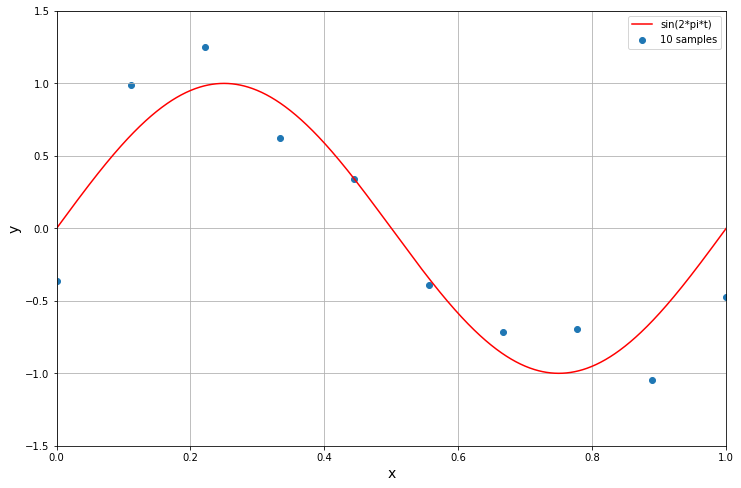

In [441]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
rcParams['figure.figsize'] = 12, 8

random.seed(1)
datalen = 10
pi = np.pi

def sin(x):      # sin(x)
  return np.sin(x)

def cos(x):      # cos(x)
  return np.cos(x)

x = np.linspace(0, 1, 1000)
y = sin(2*pi*x)
x_s = np.linspace(0, 1, 10)
#y_s = sin(2*pi*x_s)+random.uniform(-0.5, 0.5)
y_s = [sin(2*pi*(k))+random.uniform(-0.5, 0.5) for k in x_s]

plt.xlim(0,1)
plt.ylim(-1.5,1.5)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.scatter(x_s, y_s, label = '10 samples')
plt.legend()

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

#문제 2

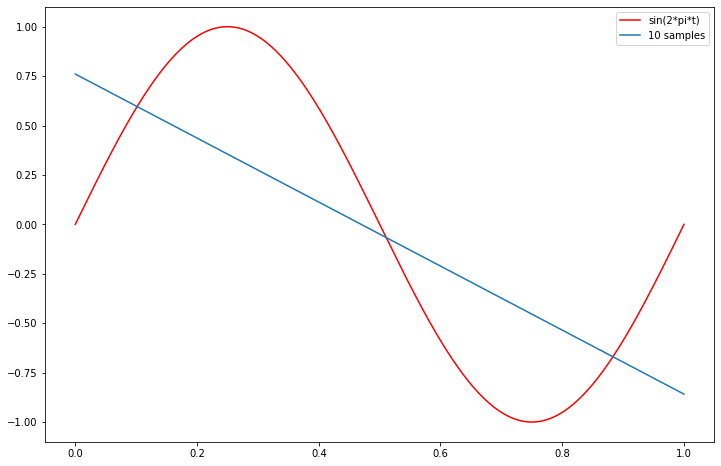

In [442]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression().fit(x_s.reshape(-1,1), y_s)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.plot(x_s,lr.predict(x_s.reshape(-1,1)), label = '10 samples')
plt.legend()


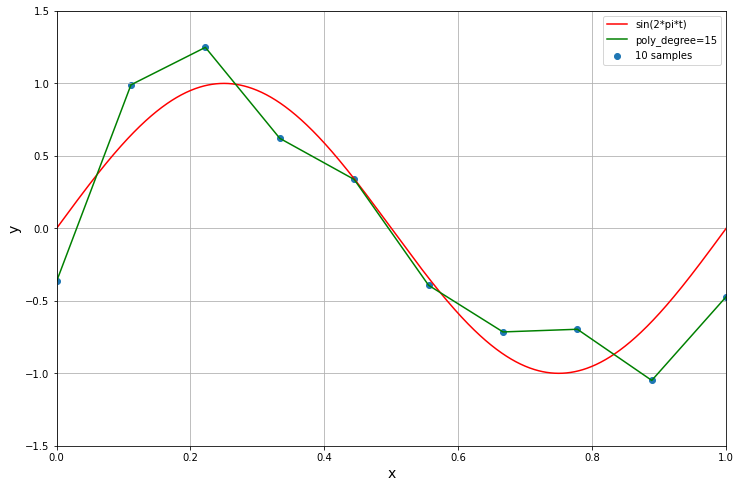

In [443]:
poly_features = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_features.fit_transform(x_s.reshape(-1,1))


lr = LinearRegression().fit(x_poly, y_s)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.plot(x_s,lr.predict(x_poly),color = 'g', label = 'poly_degree=15')
plt.scatter(x_s, y_s, label = '10 samples')

plt.legend()
plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

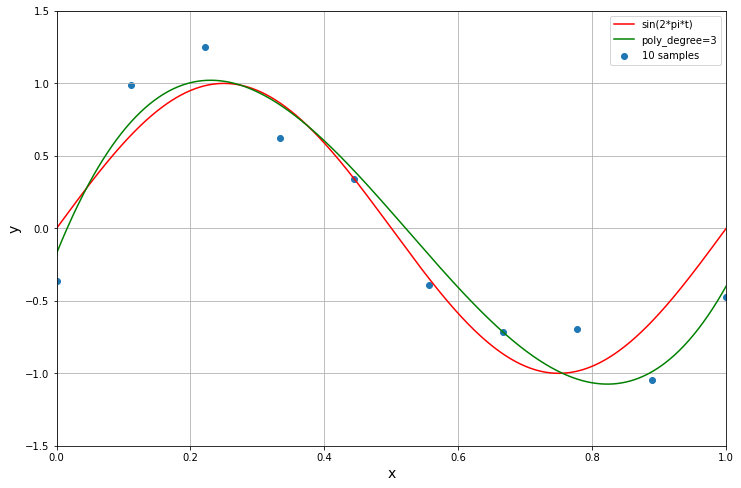

In [444]:
import numpy
mymodel = numpy.poly1d(numpy.polyfit(x_s, y_s, 3))
myline = numpy.linspace(0, 1, 1000)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.scatter(x_s, y_s, label = '10 samples')
plt.plot(myline, mymodel(myline),color = 'g', label = 'poly_degree=3')
plt.legend()

plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

#문제 3

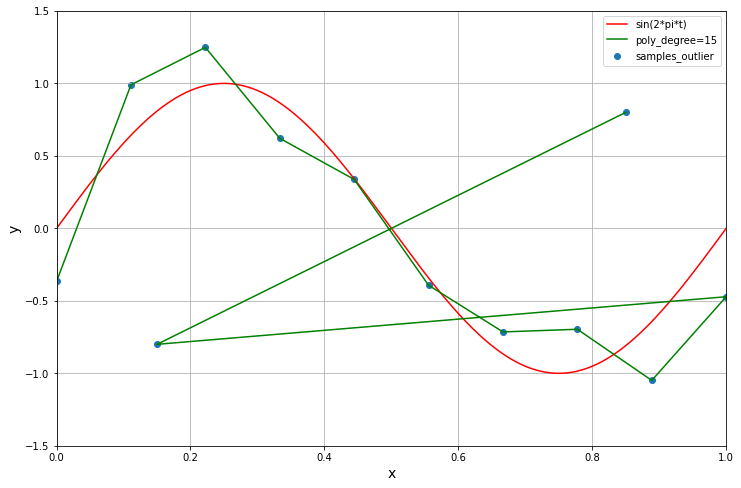

In [445]:
x_s_e = np.append(x_s, [0.15, 0.85])
x_s_e
y_s_e = np.append(y_s, [-0.8, 0.8])
y_s_e

poly_features = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_features.fit_transform(x_s_e.reshape(-1,1))


lr = LinearRegression().fit(x_poly, y_s_e)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.plot(x_s_e,lr.predict(x_poly),color = 'g', label = 'poly_degree=15')
plt.scatter(x_s_e, y_s_e, label = 'samples_outlier')

plt.legend()
plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

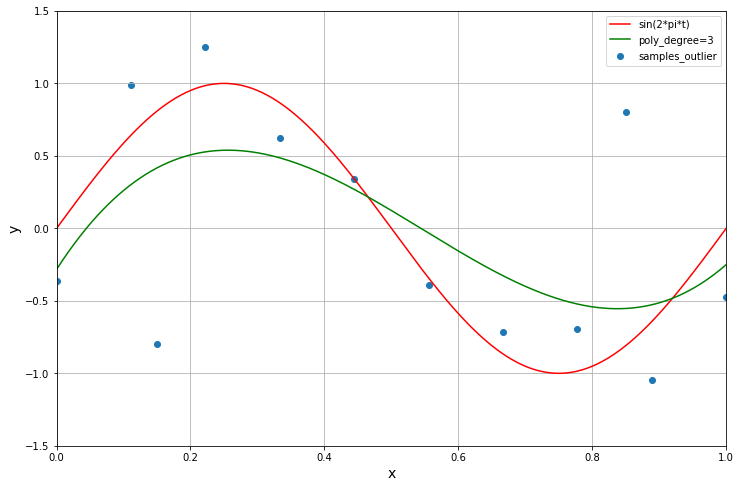

In [446]:
x_s_e = np.append(x_s, [0.15, 0.85])
x_s_e
y_s_e = np.append(y_s, [-0.8, 0.8])
y_s_e

mymodel = numpy.poly1d(numpy.polyfit(x_s_e, y_s_e, 3))
myline = numpy.linspace(0, 1, 1000)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.scatter(x_s_e, y_s_e, label = 'samples_outlier')
plt.plot(myline, mymodel(myline),color = 'g', label = 'poly_degree=3')
plt.legend()

plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

#문제 4

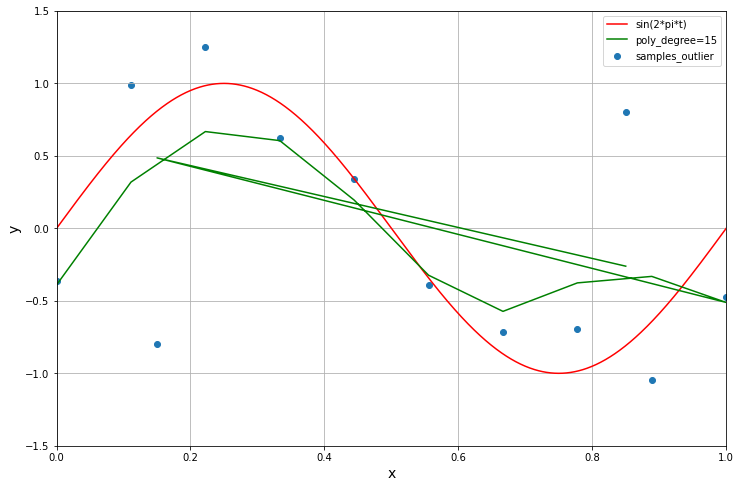

In [469]:
#L2 규제(Ridge)
from sklearn.linear_model import Ridge
rcParams['figure.figsize'] = 12,8

poly_features = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_features.fit_transform(x_s_e.reshape(-1,1))


ridge = Ridge(alpha=0.0001).fit(x_poly, y_s_e)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.plot(x_s_e,ridge.predict(x_poly),color = 'g', label = 'poly_degree=15')
plt.scatter(x_s_e, y_s_e, label = 'samples_outlier')
plt.legend()

plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.258e-01, tolerance: 6.904e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


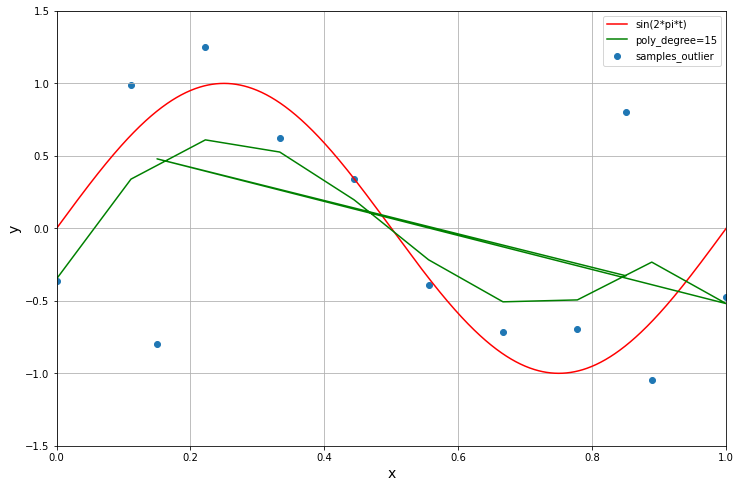

In [482]:
#L1 규제(lasso)
from sklearn.linear_model import Lasso
rcParams['figure.figsize'] = 12,8

poly_features = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_features.fit_transform(x_s_e.reshape(-1,1))


lasso = Lasso(alpha=0.0001).fit(x_poly, y_s_e)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.plot(x_s_e,lasso.predict(x_poly),color = 'g', label = 'poly_degree=15')
plt.scatter(x_s_e, y_s_e, label = 'samples_outlier')
plt.legend()

plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

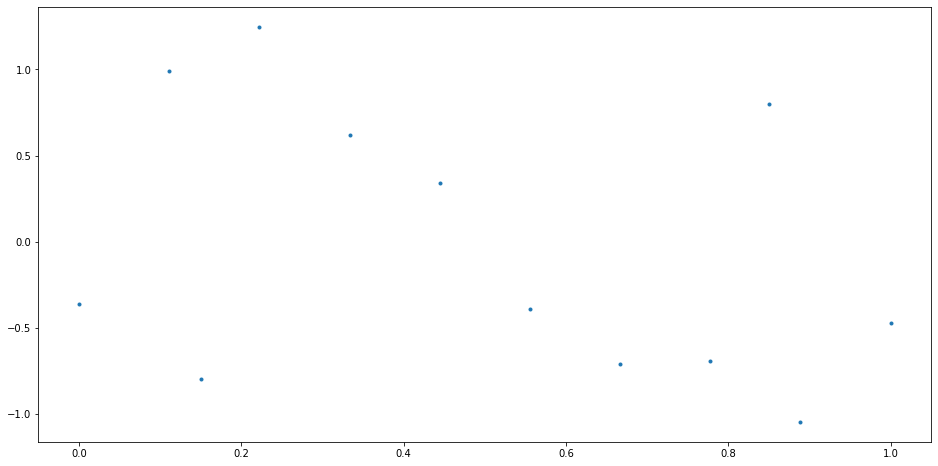

In [432]:
#L2 규제(ridge)
import numpy as np
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

x = x_s_e
# = np.array([i for i in range(0, 1, 10)])
y = y_s_e
#y = np.sin(x) + np.random.normal(0, 0.15, len(x))

data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])
plt.plot(data['x'], data['y'], '.')
for i in range(2, 16):  
    colname = 'x_%d'%i  
    data[colname] = data['x']**i

In [433]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]  #파라미터값인 alpha_ridge를 케이스 별로 나눕니다.

col = ['rss', 'intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

In [434]:
def ridge_regression(data, predictors, alpha, models_to_plot):
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])

    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g'%alpha)

    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.08574e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: Futu

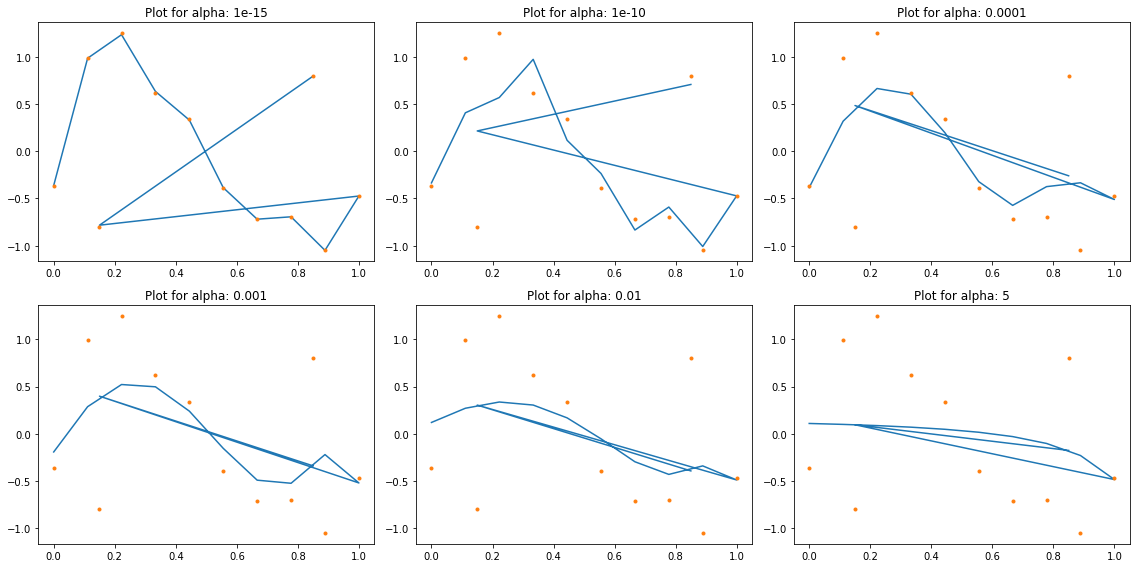

In [438]:
for i in range(10):
    coef_matrix_ridge.iloc[i, ] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

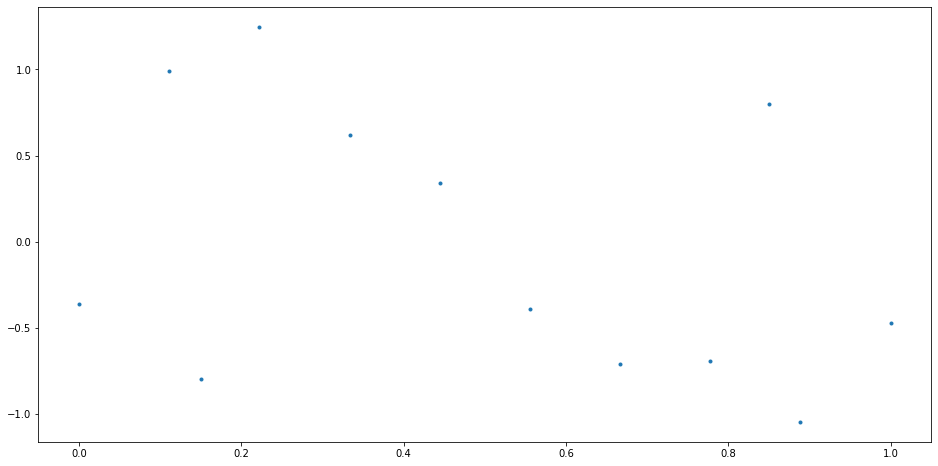

In [371]:
#L1 규제(lasso)
import numpy as np
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

x = x_s_e
y = y_s_e
data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])
plt.plot(data['x'], data['y'], '.')
for i in range(2, 16):  # power
    colname = 'x_%d'%i  #new var will be x_power
    data[colname] = data['x']**i

In [372]:
# Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]  #파라미터값인 alpha_ridge를 케이스 별로 나눕니다.

# Initialize the dataframe for storing coefficients.
col = ['rss', 'intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

In [373]:
def lasso_regression(data, predictors, alpha, models_to_plot):
    # Fit the model
    lassoreg= Lasso(alpha=alpha, normalize=True)
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g'%alpha)

    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.268e+00, tolerance: 6.

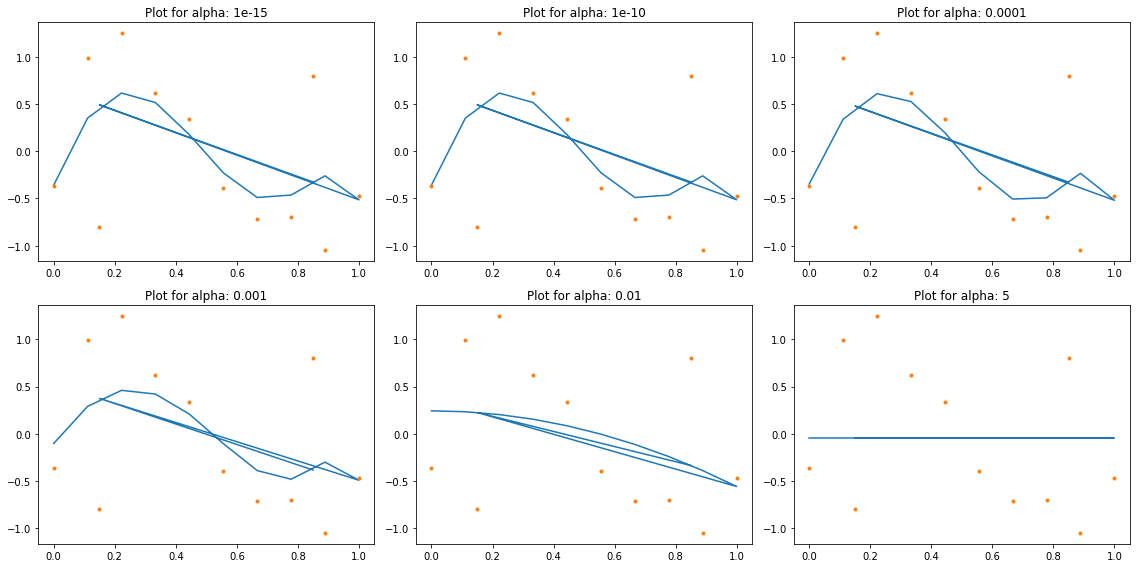

In [336]:
for i in range(10):
    coef_matrix_ridge.iloc[i, ] = lasso_regression(data, predictors, alpha_ridge[i], models_to_plot)

#문제 5

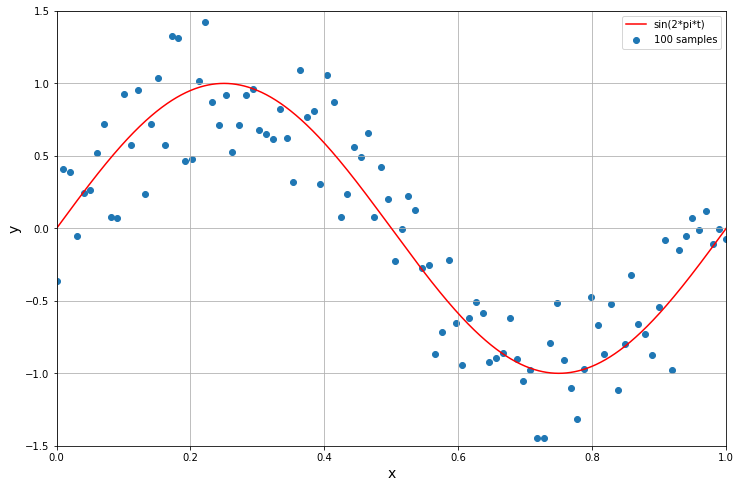

In [483]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
rcParams['figure.figsize'] = 12, 8

random.seed(1)
datalen = 10
pi = np.pi

def sin(x):      # sin(x)
  return np.sin(x)

def cos(x):      # cos(x)
  return np.cos(x)

x = np.linspace(0, 1, 1000)
y = sin(2*pi*x)
x_s = np.linspace(0, 1, 100)
#y_s = sin(2*pi*x_s)+random.uniform(-0.5, 0.5)
y_s = [sin(2*pi*(k))+random.uniform(-0.5, 0.5) for k in x_s]

plt.xlim(0,1)
plt.ylim(-1.5,1.5)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.scatter(x_s, y_s, label = '100 samples')
plt.legend()

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

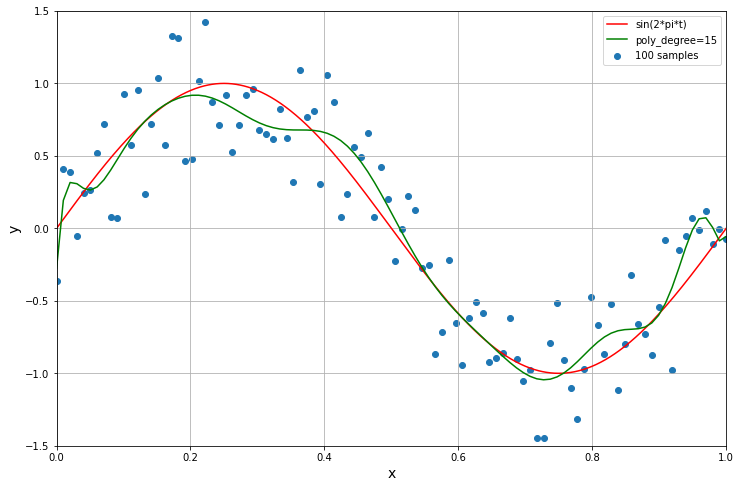

In [490]:
poly_features = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_features.fit_transform(x_s.reshape(-1,1))


lr = LinearRegression().fit(x_poly, y_s)

plt.plot(x, y, color = 'r', label = 'sin(2*pi*t)')
plt.plot(x_s,lr.predict(x_poly),color = 'g', label = 'poly_degree=15')
plt.scatter(x_s, y_s, label = '100 samples')
plt.legend()

plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()